In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv("car_dataset.csv")
data.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [2]:
data = data.dropna(axis=0) # 320 rows dropped 
data = data.drop_duplicates().reset_index(drop=True) # 50 rows dropped
data.describe(include="all") 

Brand          Price   Body      Mileage      EngineV  \
count         3975    3975.000000   3975  3975.000000  3975.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           871            NaN   1518          NaN          NaN   
mean           NaN   19056.936091    NaN   164.820126     2.763643   
std            NaN   24976.141632    NaN   103.117252     4.965189   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6950.000000    NaN    92.000000     1.800000   
50%            NaN   11400.000000    NaN   159.000000     2.200000   
75%            NaN   21317.500000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         3975         3975  3975.000000     3975  
unique           4            2          NaN      306  
top         Diesel          yes          NaN  E-Class  
freq          1832         3604          NaN      181  
mean           NaN          NaN  2006.290063      NaN  
std            NaN          NaN     6.683223      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2002.000000      NaN  
50%            NaN          NaN  2007.000000      NaN  
75%            NaN          NaN  2011.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [3]:
x = data[[column for column in data.columns if column!= "Price"]]
y = data["Price"]

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
3793     Volkswagen        van      163      2.5      Diesel          yes   
3794         Toyota      sedan       35      1.6      Petrol          yes   
3795  Mercedes-Benz      sedan        9      3.0      Diesel          yes   
3796            BMW      sedan        1      3.5      Petrol          yes   
3797     Volkswagen        van      124      2.0      Diesel          yes   

      Year              Model  
0     1991                320  
1     1999       Sprinter 212  
2     2003              S 500  
3     2007                 Q7  
4     2011              Rav 4  
...    ...                ...  
3793  2008   T5 (Transporter)  
3794  2014            Corolla  
3795  2014              S 350  
3796  1999                535  
3797  2013  T5 (Transporter)   

[3798 rows x 8 columns]

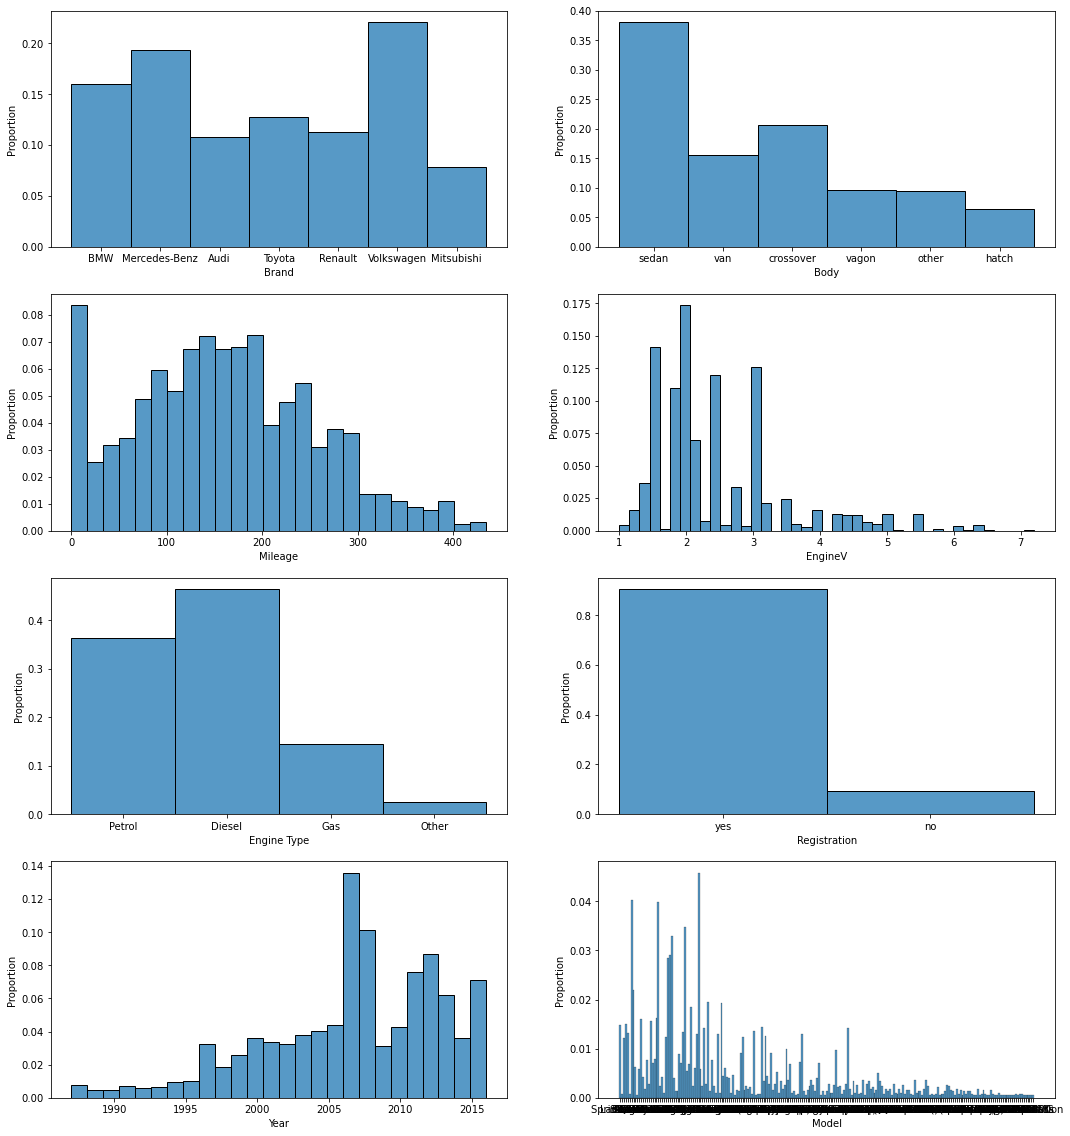

In [10]:
n = 4
f, axs = plt.subplots(n,2, figsize=(18,n*5))
columns = iter(x.columns)
for i in range(n):
    for ax in axs[i]:
        sns.histplot(x=x[next(columns)], ax=ax, stat="proportion")
x

### At first glance we can see that Mlieage, EngineV, Year and Models have outliers.

In [5]:
q = x['Mileage'].quantile(0.99)
x = x.drop(x.loc[x["Mileage"] > q].index)\
    .reset_index(drop=True)
x.describe() # 41 rows has been dropped

Mileage      EngineV         Year
count  3935.000000  3935.000000  3935.000000
mean    161.176366     2.767695  2006.387294
std      96.379226     4.989625     6.606558
min       0.000000     0.600000  1969.000000
25%      91.000000     1.800000  2003.000000
50%     158.000000     2.200000  2007.000000
75%     230.000000     3.000000  2011.000000
max     435.000000    99.990000  2016.000000

In [6]:
q = x['Year'].quantile(0.01)
q
x = x.drop(x.loc[x["Year"] < q].index)\
    .reset_index(drop=True)

x.describe()  

Mileage      EngineV         Year
count  3899.000000  3899.000000  3899.000000
mean    160.918954     2.774783  2006.598872
std      96.118621     5.011820     6.248502
min       0.000000     0.600000  1987.000000
25%      91.000000     1.800000  2003.000000
50%     157.000000     2.200000  2008.000000
75%     228.000000     3.000000  2012.000000
max     435.000000    99.990000  2016.000000

### over 2% of models apear only one, so those haven't any predictic power anyway

In [7]:
histogram = x[["Model"]]
histogram["Count"] = np.ones(x.last_valid_index()+1)
histogram = histogram.groupby("Model")\
    .count()
q = histogram['Count'].quantile(0.01)

counts = iter(histogram["Count"])
models_to_drop = [model for model in histogram["Count"].keys() if next(counts) <= q]

for model in models_to_drop:
    x = x.drop(x.loc[x["Model"] == model].index)

x = x.reset_index(drop=True)
x.describe() # 40 rows has been dropped    

/tmp/ipykernel_28872/4077913610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  histogram["Count"] = np.ones(x.last_valid_index()+1)


Mileage      EngineV         Year
count  3818.000000  3818.000000  3818.000000
mean    161.303562     2.762488  2006.645888
std      95.885954     4.990312     6.203670
min       0.000000     1.000000  1987.000000
25%      92.000000     1.800000  2003.000000
50%     158.000000     2.200000  2008.000000
75%     229.000000     3.000000  2012.000000
max     435.000000    99.990000  2016.000000

According to Google, the biggest EngineV which exist is equal to 8,3l, so I drop all values bigger than that value

In [8]:
x = x.drop(x.loc[x["EngineV"] > 8.2].index)\
    .reset_index(drop=True)
x.describe() #has been dropped 21 rows

Mileage      EngineV         Year
count  3798.000000  3798.000000  3798.000000
mean    161.095050     2.464521  2006.664034
std      95.895467     0.971615     6.199036
min       0.000000     1.000000  1987.000000
25%      92.000000     1.800000  2003.000000
50%     158.000000     2.200000  2008.000000
75%     227.000000     3.000000  2012.000000
max     435.000000     7.200000  2016.000000

In [9]:
4345-3798.000000 # 547.0
547.0/4345 # 13%

0.12589182968929805

### *In total I have dropped 13% of rows - 547*